In [44]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from hfn import *
import os

In [57]:
# images = []
# for filename in os.listdir("sample/bw/clean"):
#     images.append(Image.open(f"sample/bw/clean/{filename}"))

from datasets import load_dataset

dataset = load_dataset("fashion_mnist", split = "test").shuffle(seed = 1)
patterns = dataset[:5]["image"]

hopfield = HopfieldNetwork(patterns[0].size)

for i in patterns:
    states = hopfield.process_image(i)
    hopfield.train_network(states)

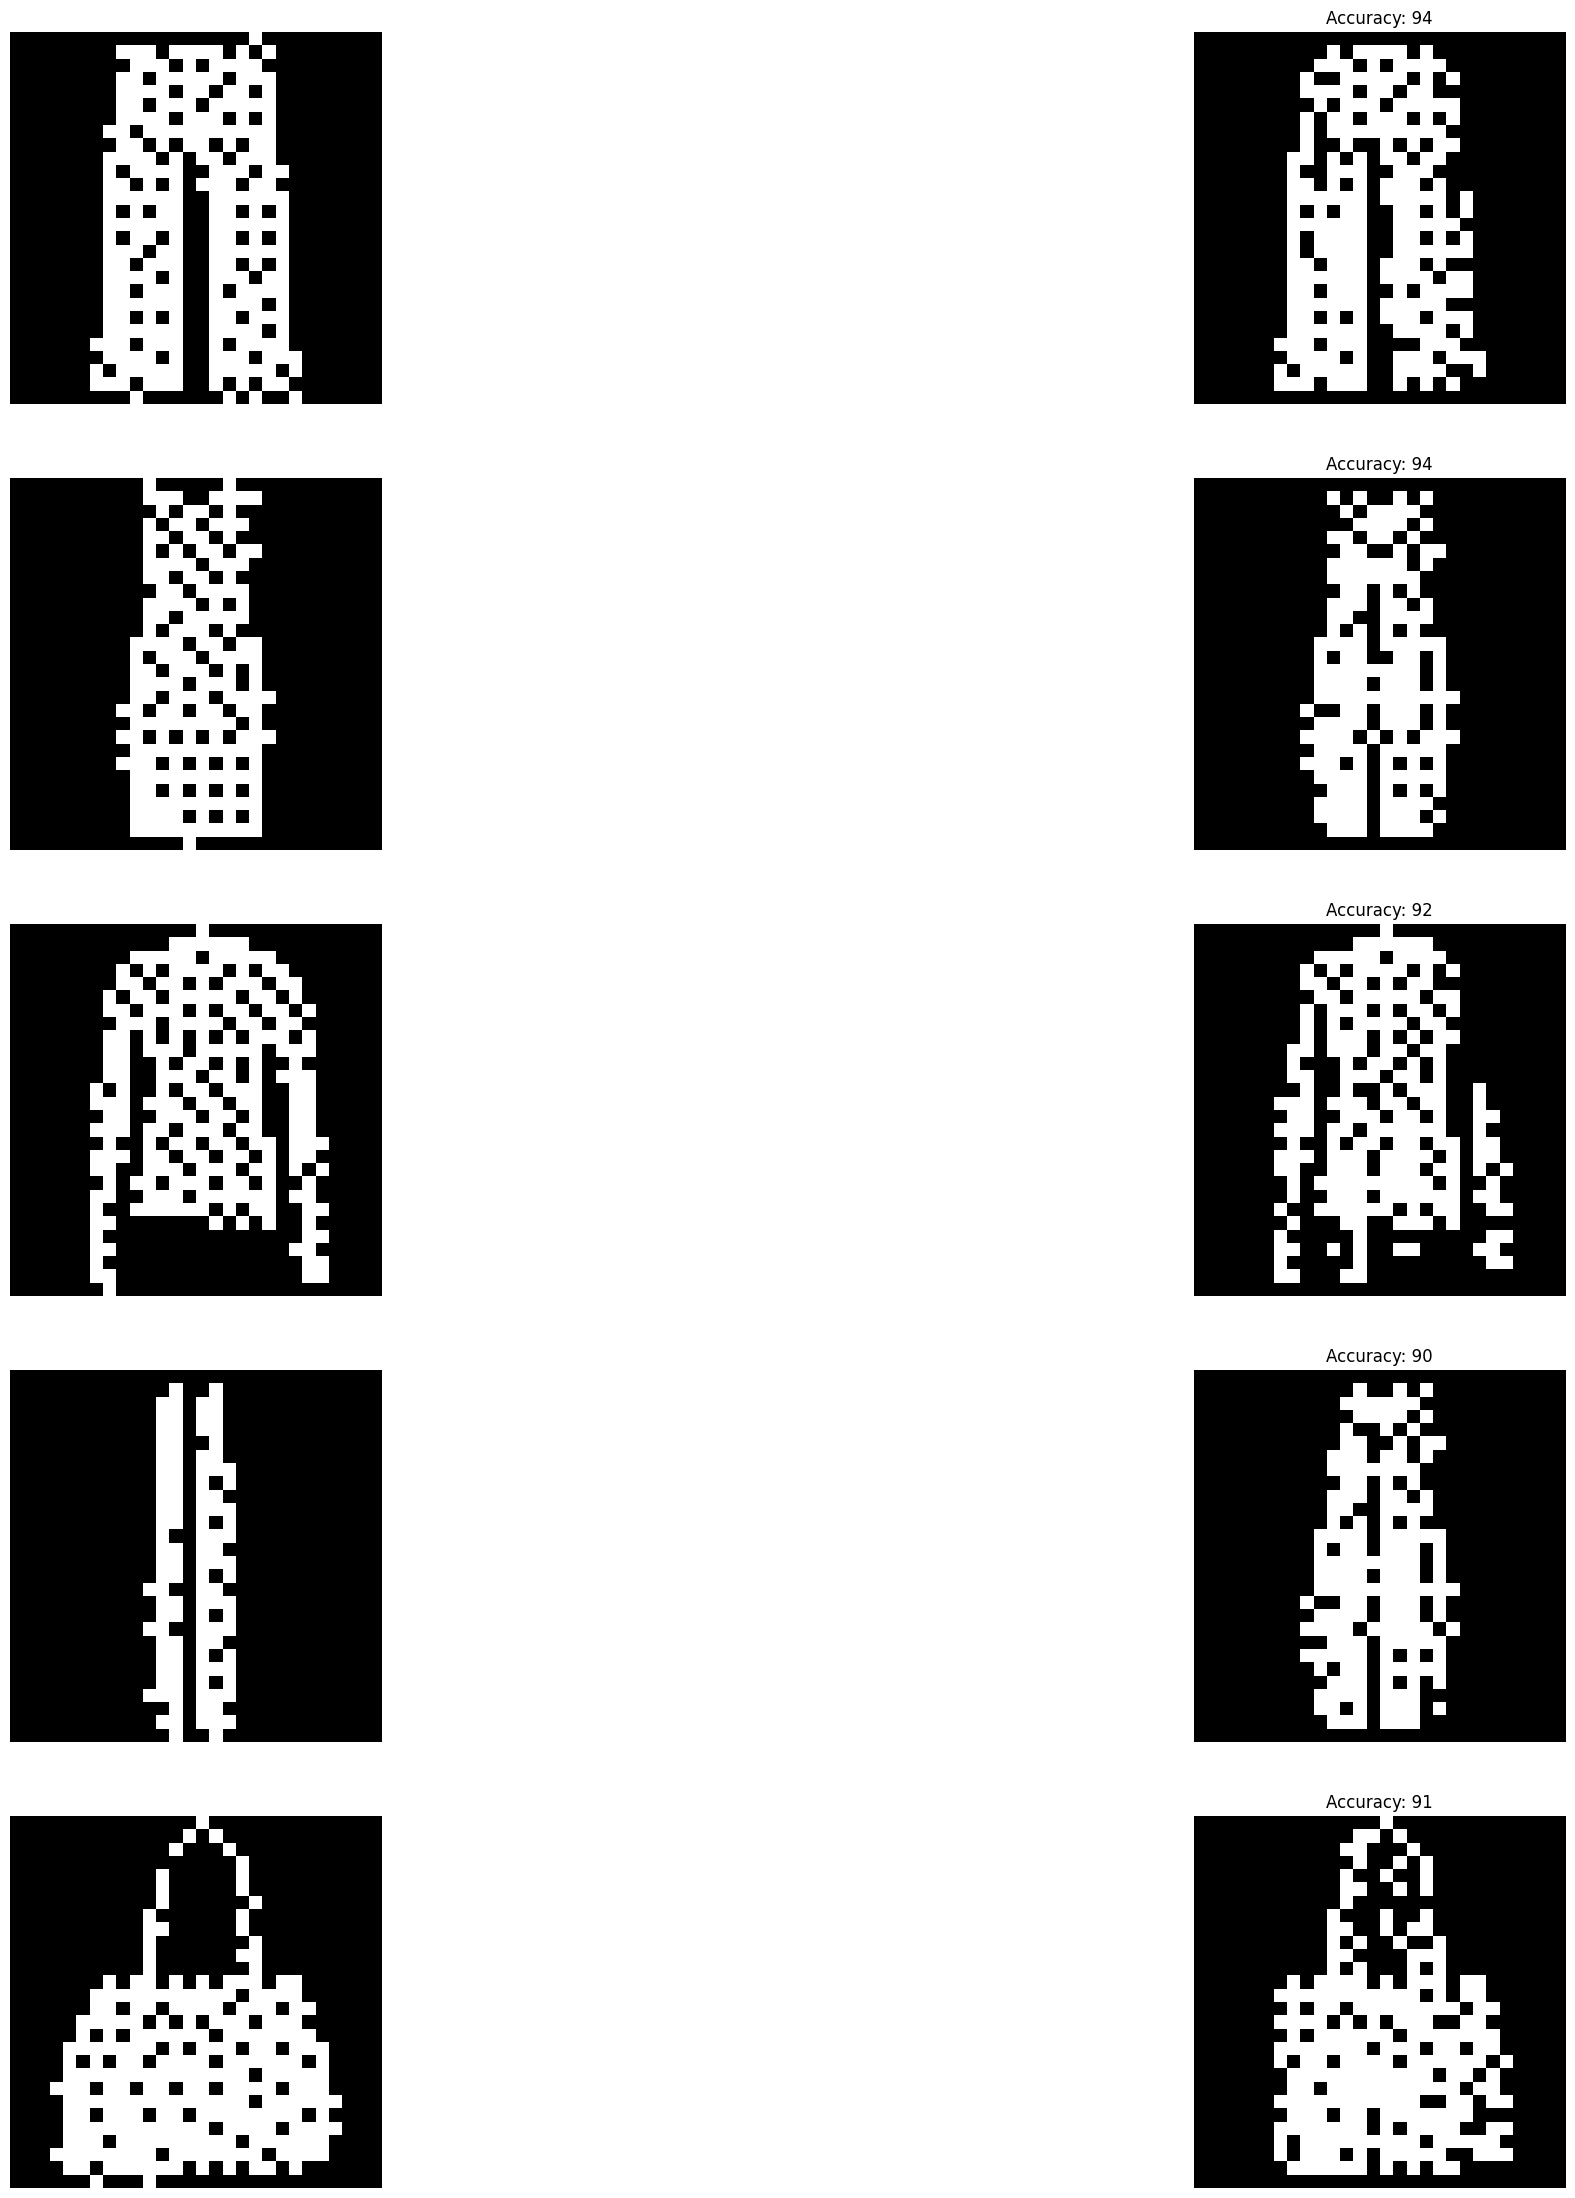

In [58]:
np.random.seed(777)
plt.figure(figsize=patterns[0].size)
for index, i in enumerate(patterns):
    i = i.convert("1")
    states = hopfield.process_image(i)
    # j = states.copy()
    # for _ in range(100):
    #     j = hopfield.update_async(j)
    # outi = hopfield.restore_image(j)

    out = hopfield.update_sync(states)
    outi = hopfield.restore_image(out)

    
    plt.subplot(5, 2, index * 2 + 1)
    plt.axis('off')
    plt.imshow(i)

    
    plt.subplot(5, 2, index * 2 + 2)
    accuracy = np.sum(states == out) * 100 // np.prod(i.size)
    plt.title(f"Accuracy: {accuracy}")
    plt.axis('off')
    plt.imshow(outi)

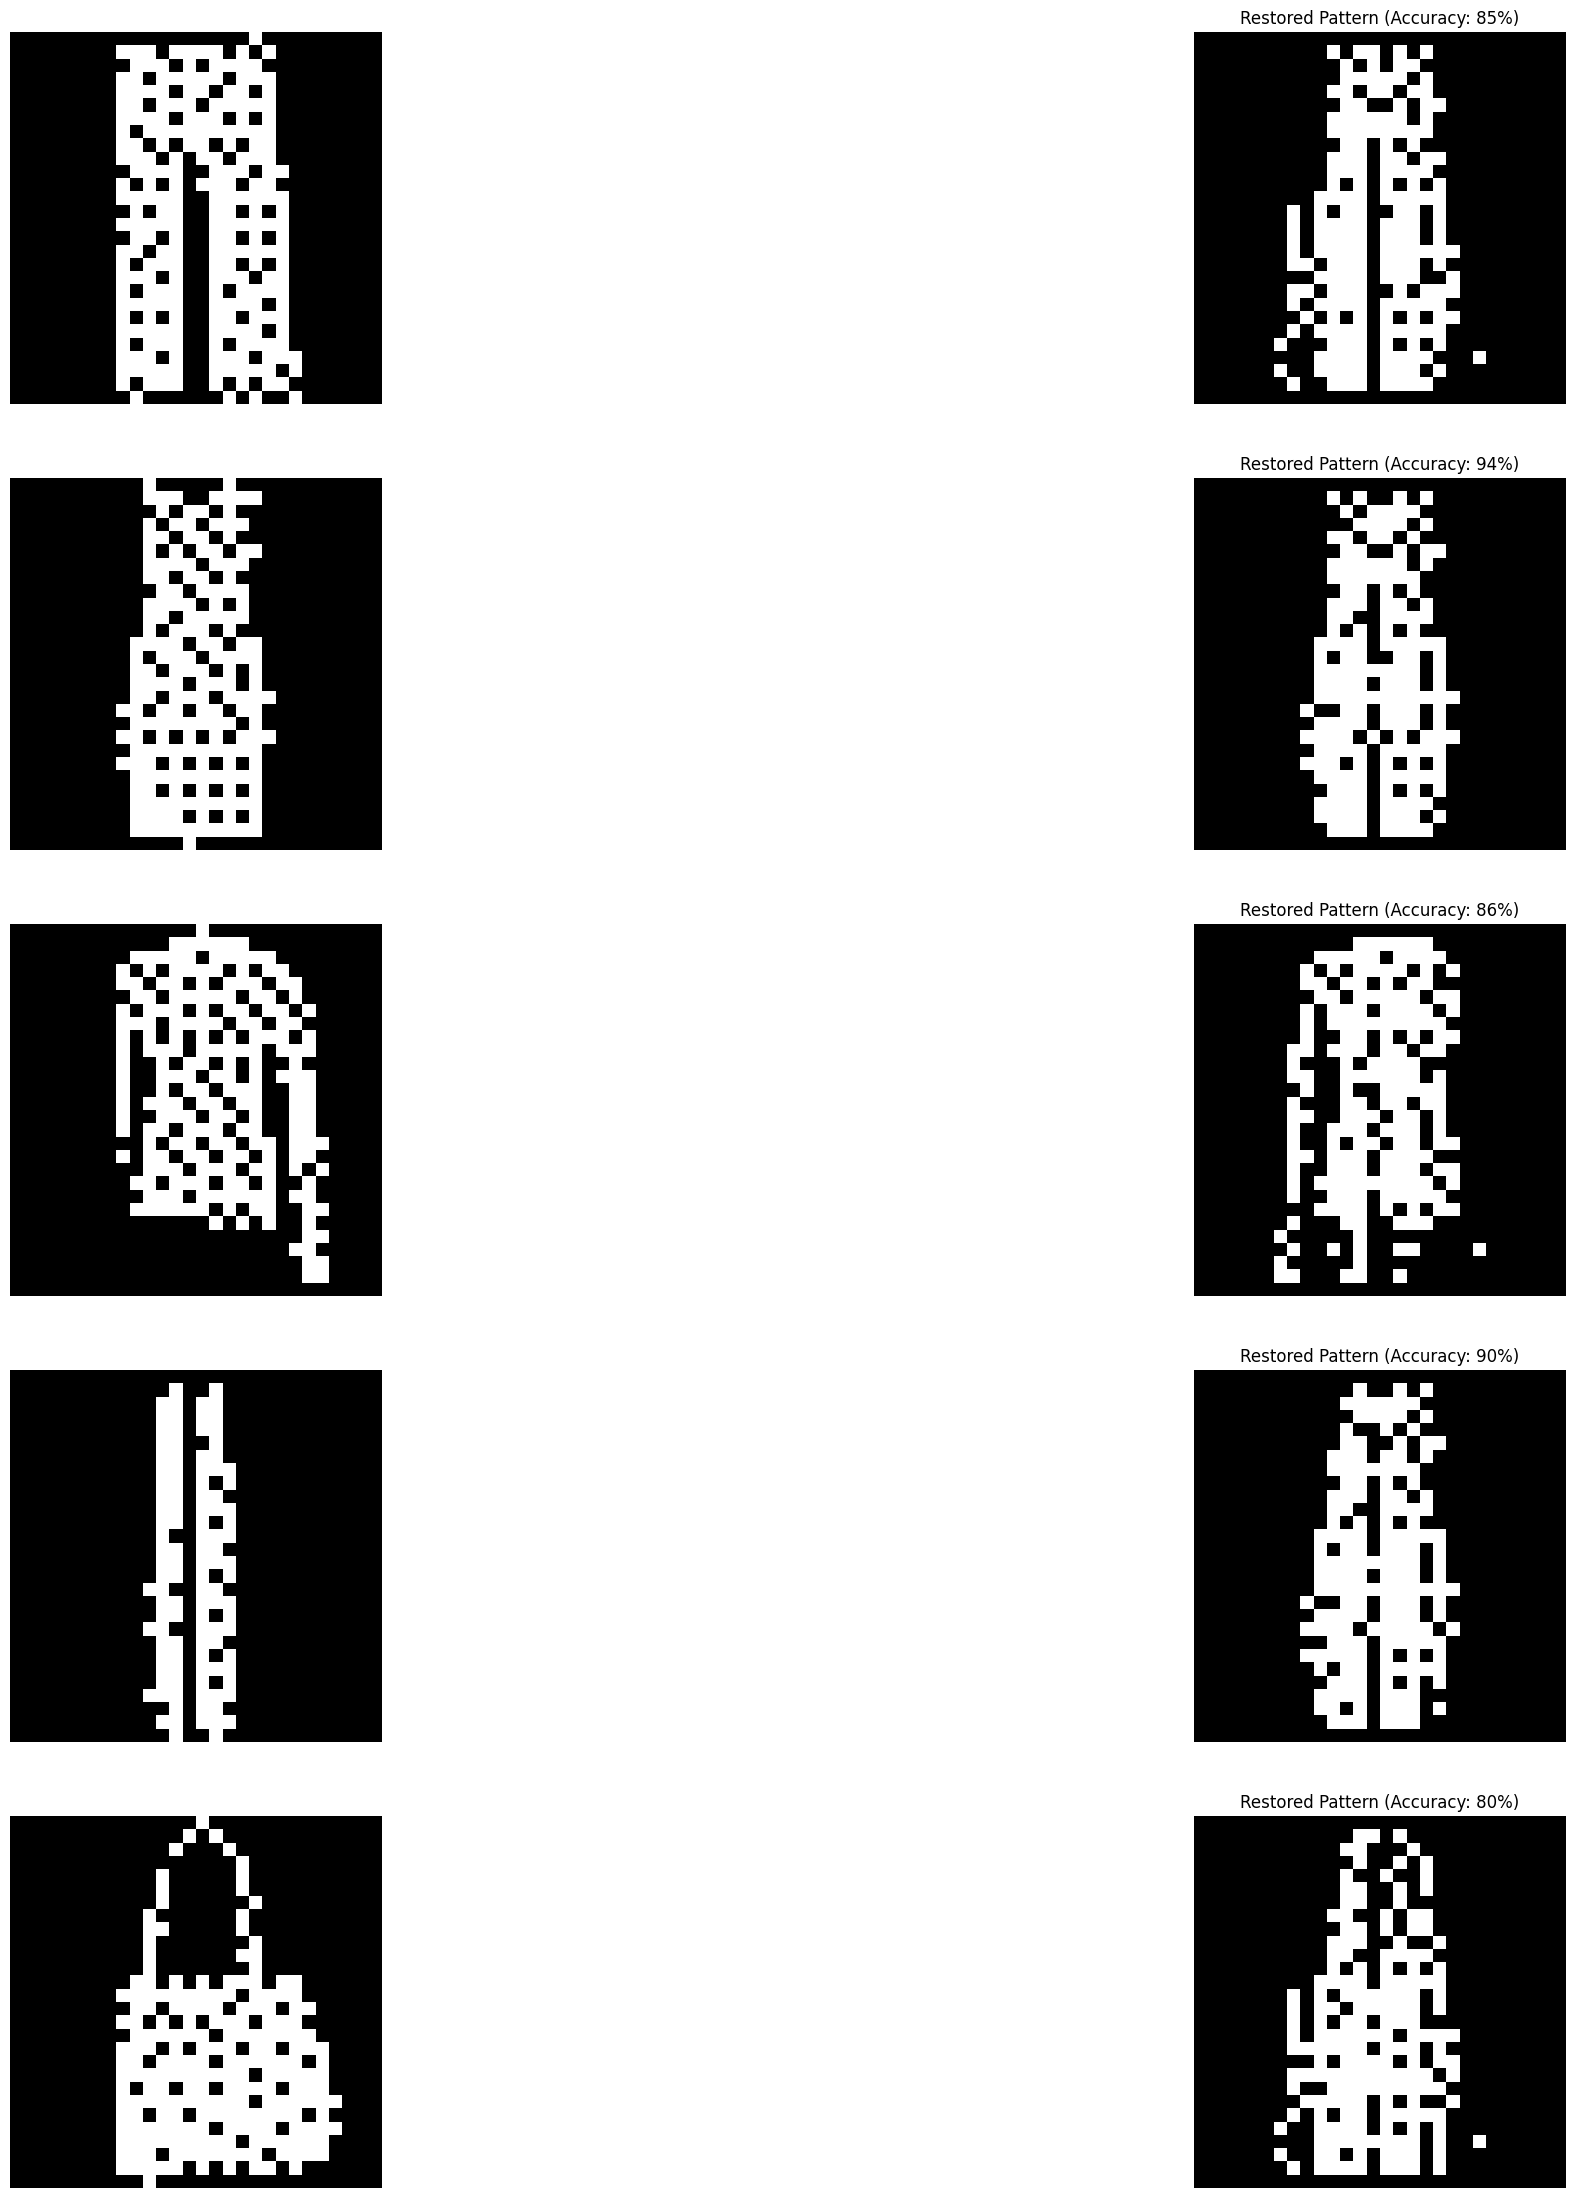

In [60]:
# cimages = []
# for filename in os.listdir("sample/bw/corrupted"):
#     cimages.append(Image.open(f"sample/bw/corrupted/{filename}"))
    
# plt.figure(figsize=cimages[0].size)
# for index, i in enumerate(cimages):
#     i = i.convert("1")
#     if index == 4:
#         i = images[2]
#     states = hopfield.process_image(i)
#     # j = states.copy()
#     # for _ in range(100):
#     #     j = hopfield.update_async(j)
#     # outi = hopfield.restore_image(j)

#     out = hopfield.update_sync(states)
#     outi = hopfield.restore_image(out)

#     states2 = hopfield.process_image(images[index // 2])

#     plt.subplot(10, 2, index * 2 + 1)
#     plt.imshow(i)

#     plt.subplot(10, 2, index * 2 + 2)
#     accuracy = np.sum(states2 == out) * 100 // np.prod(i.size)
#     plt.title(f"Accuracy: {accuracy}")
#     plt.imshow(outi)

plt.figure(figsize=patterns[0].size)
for index, i in enumerate(patterns):
    i = i.convert("1")
    mask = Image.new("1", (8, i.size[1]))
    cimg = i.copy()
    cimg.paste(mask)
    states = hopfield.process_image(cimg)
    out = hopfield.update_sync(states)
    outi = hopfield.restore_image(out)

    plt.subplot(5, 2, index * 2 + 1)
    plt.axis("off")
    plt.imshow(cimg)
    plt.subplot(5, 2, (index + 1) * 2)
    plt.title(f"Restored Pattern (Accuracy: {np.sum(np.asarray(i) == np.asarray(outi)) * 100 // np.prod(i.size)}%)")
    plt.axis("off")
    plt.imshow(outi)